## Welcome

This is material for the **Difference-in-Differences** chapter in Scott Cunningham's book, [Causal Inference: The Mixtape.](https://mixtape.scunning.com/)


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

import plotnine as p

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# read data
def read_data(file):
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)

In [3]:
abortion = read_data('abortion.dta')
abortion = abortion[~pd.isnull(abortion.lnr)]
abortion_bf15 = abortion[abortion.bf15==1]

In [36]:
formula = (
    "lnr ~ C(repeal)*C(year) + C(fip)"
    " + acc + ir + pi + alcohol + crack + poverty + income + ur"
)

reg = (
    smf
    .wls(formula, data=abortion_bf15, weights=abortion_bf15.totpop.values)
    .fit(
        cov_type='cluster', 
        cov_kwds={'groups': abortion_bf15.fip.values}, 
        method='pinv')
)


In [9]:
reg.summary()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 89, but rank is 27
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:764: RuntimeWarning: divide by zero encountered in log


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                    lnr   R-squared:                       0.857
Model:                            WLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     1898.
Date:                Sun, 14 Mar 2021   Prob (F-statistic):           1.66e-66
Time:                        13:37:24   Log-Likelihood:                   -inf
No. Observations:                 737   AIC:                               inf
Df Residuals:                     648   BIC:                               inf
Df Model:                          88                                         
Covariance Type:              cluster                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              7.4753      1.176      6.356      0.000       5.170       9.781
C(repeal)[T.1.0]                      -1.3596      0.412     -3.296      0.001      -2.168      -0.551
C(year)[T.1986.0]                     -0.0208      0.058     -0.361      0.718      -0.134       0.092
C(year)[T.1987.0]                     -0.2865      0.111     -2.579      0.010      -0.504      -0.069
C(year)[T.1988.0]                     -0.3495      0.131     -2.667      0.008      -0.606      -0.093
C(year)[T.1989.0]                     -0.4072      0.173     -2.349      0.019      -0.747      -0.067
C(year)[T.1990.0]                     -0.4864      0.217     -2.244      0.025      -0.911      -0.062
C(year)[T.1991.0]                     -0.5353      0.223     -2.398      0.016      -0.973      -0.098
C(year)[T.1992.0]                     -0.7866      0.269     -2.927      0.003      -1.313      -0.260
C(year)[T.1993.0]                     -0.9767      0.287     -3.403      0.001      -1.539      -0.414
C(year)[T.1994.0]                     -1.0644      0.323     -3.297      0.001      -1.697      -0.432
C(year)[T.1995.0]                     -1.3562      0.375     -3.612      0.000      -2.092      -0.620
C(year)[T.1996.0]                     -1.5201      0.415     -3.667      0.000      -2.333      -0.707
C(year)[T.1997.0]                     -1.5718      0.468     -3.359      0.001      -2.489      -0.655
C(year)[T.1998.0]                     -1.5451      0.536     -2.884      0.004      -2.595      -0.495
C(year)[T.1999.0]                     -1.5874      0.579     -2.743      0.006      -2.722      -0.453
C(year)[T.2000.0]                     -1.6726      0.658     -2.543      0.011      -2.962      -0.383
C(fip)[T.2.0]                         -0.4761      0.267     -1.784      0.074      -0.999       0.047
C(fip)[T.4.0]                         -0.9589      0.524     -1.829      0.067      -1.986       0.068
C(fip)[T.5.0]                          0.0860      0.065      1.319      0.187      -0.042       0.214
C(fip)[T.6.0]                          0.0982      0.192      0.512      0.608      -0.277       0.474
C(fip)[T.8.0]                         -0.8246      0.418     -1.971      0.049      -1.645      -0.005
C(fip)[T.9.0]                         -1.6809      0.736     -2.285      0.022      -3.122      -0.239
C(fip)[T.10.0]                        -0.7458      0.484     -1.540      0.123      -1.695       0.203
C(fip)[T.11.0]                        -2.1124      1.246     -1.695      0.090      -4.555       0.331
C(fip)[T.12.0]                        -1.0947      0.514     -2.132      0.033      -2.101      -0.088
C(fip)[T.13.0]                        -0.7216      0.246     -2.930      0.003      -1.204      

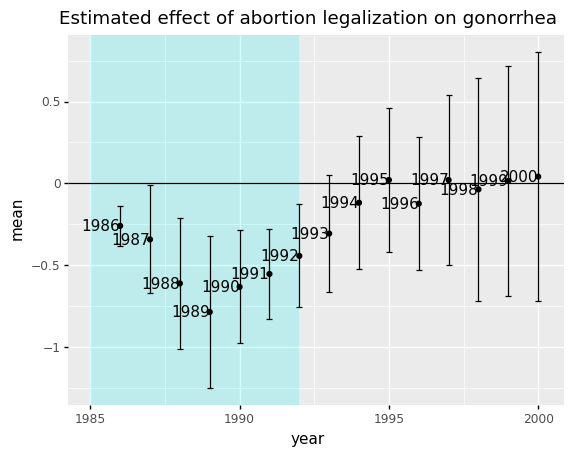

<ggplot: (8785898979952)>

In [35]:
abortion_plot = pd.DataFrame(
    {
        'sd': reg.bse['C(repeal)[T.1.0]:C(year)[T.1986.0]':'C(repeal)[T.1.0]:C(year)[T.2000.0]'],
        'mean': reg.params['C(repeal)[T.1.0]:C(year)[T.1986.0]':'C(repeal)[T.1.0]:C(year)[T.2000.0]'],
        'year': np.arange(1986, 2001)
    })
abortion_plot['lb'] = abortion_plot['mean'] - abortion_plot['sd']*1.96
abortion_plot['ub'] = abortion_plot['mean'] + abortion_plot['sd']*1.96

(
    p.ggplot(abortion_plot, p.aes(x = 'year', y = 'mean')) + 
    p.geom_rect(p.aes(xmin=1985, xmax=1992, ymin=-np.inf, ymax=np.inf), fill="cyan", alpha = 0.01) +
    p.geom_point() +
    p.geom_text(p.aes(label = 'year'), ha='right') +
    p.geom_hline(yintercept = 0) +
    p.geom_errorbar(p.aes(ymin = 'lb', ymax = 'ub'), width = 0.2,
                    position = p.position_dodge(0.05)) +
    p.labs(title= "Estimated effect of abortion legalization on gonorrhea")
)

#### Questions
- Describe in your own words the testable predictions from the roll out of repeal versus Roe in the population?  In other words, describe the behavior of the DD coefficients under this regression.  
- Do we find evidence consistent with this in our DD analysis?  List all the evidence for and against the hypothesis in this analysis. 
- Does it appear that there was an effect in the period where Roe has not fully caught up?




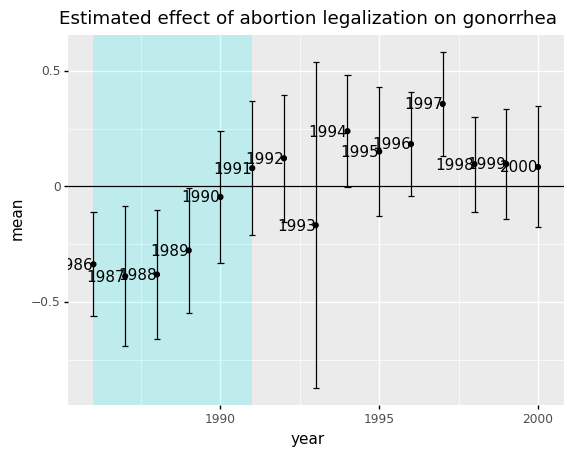

<ggplot: (8785873439052)>

In [37]:
abortion = read_data('abortion.dta')
abortion = abortion[~pd.isnull(abortion.lnr)]

abortion['yr'] = 0
abortion.loc[(abortion.younger==1) & (abortion.repeal==1), 'yr'] = 1

abortion['wm'] = 0
abortion.loc[(abortion.wht==1) & (abortion.male==1), 'wm'] = 1

abortion['wf'] = 0
abortion.loc[(abortion.wht==1) & (abortion.male==0), 'wf'] = 1

abortion['bm'] = 0
abortion.loc[(abortion.wht==0) & (abortion.male==1), 'bm'] = 1

abortion['bf'] = 0
abortion.loc[(abortion.wht==0) & (abortion.male==0), 'bf'] = 1


abortion_filt = abortion[(abortion.bf==1) & (abortion.age.isin([15,25]))]

reg = (
    smf
    .wls("""lnr ~ C(repeal)*C(year) + C(younger)*C(repeal) + C(younger)*C(year) + 
C(yr)*C(year) + C(fip)*t + acc + ir + pi + alcohol + crack + poverty + income + ur""", 
        data=abortion_filt, weights=abortion_filt.totpop.values)
    .fit(
        cov_type='cluster', 
        cov_kwds={'groups': abortion_filt.fip.values}, 
        method='pinv')
)

abortion_plot = pd.DataFrame({'sd': reg.bse['C(yr)[T.1]:C(year)[T.1986.0]':'C(yr)[T.1]:C(year)[T.2000.0]'],
             'mean': reg.params['C(yr)[T.1]:C(year)[T.1986.0]':'C(yr)[T.1]:C(year)[T.2000.0]'],
             'year':np.arange(1986, 2001)})

abortion_plot['lb'] = abortion_plot['mean'] - abortion_plot['sd']*1.96
abortion_plot['ub'] = abortion_plot['mean'] + abortion_plot['sd']*1.96


p.ggplot(abortion_plot, p.aes(x = 'year', y = 'mean')) + \
    p.geom_rect(p.aes(xmin=1986, xmax=1991, ymin=-np.inf, ymax=np.inf), fill = "cyan", alpha = 0.01)+\
    p.geom_point()+\
    p.geom_text(p.aes(label = 'year'), ha='right')+\
    p.geom_hline(yintercept = 0) +\
    p.geom_errorbar(p.aes(ymin = 'lb', ymax = 'ub'), width = 0.2,
                position = p.position_dodge(0.05)) +\
    p.labs(title= "Estimated effect of abortion legalization on gonorrhea")

In [29]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnr   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                 2.933e+11
Date:                Sun, 14 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:46:52   Log-Likelihood:                -482.67
No. Observations:                1439   AIC:                             1207.
Df Residuals:                    1318   BIC:                             1845.
Df Model:                         120                                         
Covariance Type:              cluster                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               6.3223      0.612     10.325      0.000       5.122       7.522
C(repeal)[T.1.0]                       -1.3741      0.292     -4.699      0.000      -1.947      -0.801
C(year)[T.1986.0]                      -0.0230      0.067     -0.342      0.733      -0.155       0.109
C(year)[T.1987.0]                      -0.1503      0.085     -1.771      0.077      -0.317       0.016
C(year)[T.1988.0]                      -0.0416      0.110     -0.377      0.706      -0.257       0.174
C(year)[T.1989.0]                      -0.0915      0.127     -0.720      0.472      -0.341       0.158
C(year)[T.1990.0]                      -0.2085      0.126     -1.655      0.098      -0.456       0.038
C(year)[T.1991.0]                      -0.2578      0.128     -2.011      0.044      -0.509      -0.007
C(year)[T.1992.0]                      -0.5582      0.141     -3.968      0.000      -0.834      -0.282
C(year)[T.1993.0]                      -0.7551      0.196     -3.847      0.000      -1.140      -0.370
C(year)[T.1994.0]                      -0.7031      0.201     -3.499      0.000      -1.097      -0.309
C(year)[T.1995.0]                      -0.8990      0.211     -4.266      0.000      -1.312      -0.486
C(year)[T.1996.0]                      -1.0976      0.219     -5.018      0.000      -1.526      -0.669
C(year)[T.1997.0]                      -1.1415      0.243     -4.694      0.000      -1.618      -0.665
C(year)[T.1998.0]                      -1.0493      0.275     -3.821      0.000      -1.588      -0.511
C(year)[T.1999.0]                      -1.1586      0.298     -3.890      0.000      -1.742      -0.575
C(year)[T.2000.0]                      -1.2417      0.339     -3.660      0.000      -1.907      -0.577
C(younger)[T.1.0]                       0.7733      0.071     10.853      0.000       0.634       0.913
C(yr)[T.1]                              0.0113      0.123      0.092      0.926      -0.229       0.252
C(fip)[T.2.0]                          -0.7827      0.182     -4.296      0.000      -1.140      -0.426
C(fip)[T.4.0]                          -0.7260      0.166     -4.361      0.000      -1.052      -0.400
C(fip)[T.5.0]                           0.0177      0.041      0.431      0.666      -0.063       0.098
C(fip)[T.6.0]                           0.1788      0.068      2.616      0.009       0.045       0.313
C(fip)[T.8.0]                          -0.7862      0.220     -3.570      0.000      -1.218      -0.355
C(fip)[T.9.0]                          -1.0478      0.335     -3.131      0.002      -1.704      -0.392
C(fip)[T.10.0]                         -0.5837      0.264     -2.211      0.027      -1.101      -0.066
C(fip)[T.11.0]                         -1.8437      0.573     -3.21

#### Questions
- Why did we implement a triple difference?  What problems does this solve and to what degree do you feel it is a necessary check?
- Describe the evidence for and against the abortion selection hypothesis when using triple difference?  How is it consistent with our DD and how is it not?


In [43]:
abortion_filt = abortion[(abortion.race == 2) & (abortion.sex == 2) & (abortion.age == 20)]

regdd = (
    smf
    .wls("""lnr ~ C(repeal)*C(year) + C(fip) + acc + ir + pi + alcohol+ crack + poverty+ income+ ur""", 
        data=abortion_filt, weights=abortion_filt.totpop.values)
    .fit(
        cov_type='cluster', 
        cov_kwds={'groups': abortion_filt.fip.values}, 
        method='pinv')
)

regdd.summary()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 89, but rank is 26
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 89, but rank is 26
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:764: RuntimeWarning: divide by zero encountered in log


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                    lnr   R-squared:                       0.849
Model:                            WLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     939.6
Date:                Sun, 14 Mar 2021   Prob (F-statistic):           1.03e-58
Time:                        13:52:42   Log-Likelihood:                   -inf
No. Observations:                 733   AIC:                               inf
Df Residuals:                     645   BIC:                               inf
Df Model:                          87                                         
Covariance Type:              cluster                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              7.6028      1.228      6.193      0.000       5.197      10.009
C(repeal)[T.1.0]                      -1.3089      0.411     -3.186      0.001      -2.114      -0.504
C(year)[T.1986.0]                     -0.0373      0.057     -0.656      0.512      -0.149       0.074
C(year)[T.1987.0]                     -0.2738      0.087     -3.143      0.002      -0.445      -0.103
C(year)[T.1988.0]                     -0.3391      0.088     -3.844      0.000      -0.512      -0.166
C(year)[T.1989.0]                     -0.3962      0.114     -3.474      0.001      -0.620      -0.173
C(year)[T.1990.0]                     -0.4385      0.143     -3.070      0.002      -0.718      -0.159
C(year)[T.1991.0]                     -0.5025      0.145     -3.469      0.001      -0.786      -0.219
C(year)[T.1992.0]                     -0.7626      0.177     -4.316      0.000      -1.109      -0.416
C(year)[T.1993.0]                     -0.9654      0.201     -4.792      0.000      -1.360      -0.571
C(year)[T.1994.0]                     -1.0510      0.247     -4.250      0.000      -1.536      -0.566
C(year)[T.1995.0]                     -1.3499      0.312     -4.331      0.000      -1.961      -0.739
C(year)[T.1996.0]                     -1.4819      0.328     -4.516      0.000      -2.125      -0.839
C(year)[T.1997.0]                     -1.4779      0.382     -3.871      0.000      -2.226      -0.730
C(year)[T.1998.0]                     -1.4175      0.449     -3.158      0.002      -2.297      -0.538
C(year)[T.1999.0]                     -1.4437      0.497     -2.907      0.004      -2.417      -0.470
C(year)[T.2000.0]                     -1.4730      0.591     -2.491      0.013      -2.632      -0.314
C(fip)[T.2.0]                         -0.5259      0.399     -1.317      0.188      -1.308       0.257
C(fip)[T.4.0]                         -0.6682      0.323     -2.070      0.038      -1.301      -0.036
C(fip)[T.5.0]                         -0.0141      0.084     -0.168      0.867      -0.179       0.151
C(fip)[T.6.0]                          0.3273      0.150      2.177      0.030       0.033       0.622
C(fip)[T.8.0]                         -0.7636      0.447     -1.707      0.088      -1.641       0.113
C(fip)[T.9.0]                         -1.3407      0.624     -2.150      0.032      -2.563      -0.118
C(fip)[T.10.0]                        -0.8289      0.499     -1.661      0.097      -1.807       0.149
C(fip)[T.11.0]                        -1.8918      1.189     -1.591      0.112      -4.222       0.438
C(fip)[T.12.0]                        -0.7194      0.421     -1.709      0.087      -1.544       0.105
C(fip)[T.13.0]                        -0.5019      0.201     -2.498      0.013      -0.896      

In [44]:
abortion_filt = abortion[(abortion.bf == 1) & abortion.age.isin([20,25])]

regddd = (
    smf
    .wls("""lnr ~ C(repeal)*C(year) + acc + ir + pi + alcohol + crack + poverty + income + ur""", 
        data=abortion_filt, weights=abortion_filt.totpop.values)
    .fit(
        cov_type='cluster', 
        cov_kwds={'groups': abortion_filt.fip.values}, 
        method='pinv')
)

regddd.summary()



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 39, but rank is 27
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:764: RuntimeWarning: divide by zero encountered in log


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                    lnr   R-squared:                       0.464
Model:                            WLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     40.25
Date:                Sun, 14 Mar 2021   Prob (F-statistic):           2.25e-25
Time:                        13:53:55   Log-Likelihood:                   -inf
No. Observations:                1435   AIC:                               inf
Df Residuals:                    1396   BIC:                               inf
Df Model:                          38                                         
Covariance Type:              cluster                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              8.4337      0.677     12.451      0.000       7.106       9.761
C(repeal)[T.1.0]                      -0.5876      0.450     -1.306      0.192      -1.469       0.294
C(year)[T.1986.0]                      0.0052      0.075      0.068      0.945      -0.143       0.153
C(year)[T.1987.0]                     -0.0870      0.113     -0.768      0.443      -0.309       0.135
C(year)[T.1988.0]                      0.0720      0.108      0.666      0.506      -0.140       0.284
C(year)[T.1989.0]                      0.1852      0.135      1.376      0.169      -0.078       0.449
C(year)[T.1990.0]                      0.1857      0.147      1.267      0.205      -0.102       0.473
C(year)[T.1991.0]                      0.1640      0.175      0.939      0.348      -0.178       0.506
C(year)[T.1992.0]                      0.0174      0.201      0.087      0.931      -0.377       0.411
C(year)[T.1993.0]                     -0.2548      0.307     -0.831      0.406      -0.856       0.347
C(year)[T.1994.0]                     -0.0667      0.273     -0.244      0.807      -0.601       0.468
C(year)[T.1995.0]                     -0.3105      0.365     -0.851      0.395      -1.026       0.405
C(year)[T.1996.0]                     -0.3689      0.327     -1.128      0.259      -1.010       0.272
C(year)[T.1997.0]                     -0.3196      0.345     -0.926      0.355      -0.996       0.357
C(year)[T.1998.0]                     -0.1459      0.367     -0.398      0.691      -0.864       0.572
C(year)[T.1999.0]                     -0.1483      0.389     -0.381      0.703      -0.911       0.615
C(year)[T.2000.0]                     -0.1882      0.440     -0.428      0.669      -1.051       0.675
C(repeal)[T.1.0]:C(year)[T.1986.0]     0.1741      0.094      1.853      0.064      -0.010       0.358
C(repeal)[T.1.0]:C(year)[T.1987.0]     0.2689      0.129      2.080      0.038       0.016       0.522
C(repeal)[T.1.0]:C(year)[T.1988.0]     0.0509      0.120      0.423      0.672      -0.185       0.286
C(repeal)[T.1.0]:C(year)[T.1989.0]    -0.1146      0.137     -0.838      0.402      -0.383       0.153
C(repeal)[T.1.0]:C(year)[T.1990.0]    -0.1137      0.276     -0.413      0.680      -0.654       0.426
C(repeal)[T.1.0]:C(year)[T.1991.0]    -0.1505      0.368     -0.409      0.683      -0.872       0.571
C(repeal)[T.1.0]:C(year)[T.1992.0]    -0.0952      0.268     -0.355      0.723      -0.621       0.430
C(repeal)[T.1.0]:C(year)[T.1993.0]     0.1737      0.407      0.427      0.670      -0.624       0.972
C(repeal)[T.1.0]:C(year)[T.1994.0]     0.0725      0.434      0.167      0.867      -0.779       0.924
C(repeal)[T.1.0]:C(year)[T.1995.0]     0.2415      0.518      0.466      0.641      -0.774      

#### Questions
- Why did we suggest that conducting this additional analysis not conducted in the original study?
- How convinced are you now of the abortion selection hypothesis?  Why/why not?
- Could you have concluded this had you not exploited all of the testable predictions of the original table showing roll out across cohort and time?  
- How important was our ``model`` to forming testable predictions and falsifications? 

## Cheng and Hoekstra (2013)

In [180]:
castle = read_data('castle.dta')
crime1 = ("jhcitizen_c", "jhpolice_c", 
            "murder", "homicide", 
            "robbery", "assault", "burglary",
            "larceny", "motor", "robbery_gun_r")
demo = ("emo", "blackm_15_24", "whitem_15_24", 
          "blackm_25_44", "whitem_25_44")

# variables dropped to prevent colinearity
dropped_vars = ("r20004", "r20014",
                  "r20024", "r20034",
                  "r20044", "r20054",
                  "r20064", "r20074",
                  "r20084", "r20094",
                  "r20101", "r20102", "r20103",
                  "r20104", "trend_9", "trend_46",
                  "trend_49", "trend_50", "trend_51")
cols = pd.Series(castle.columns)
trend_cols = set(cols[cols.str.contains('^trend')])
lintrend = castle[trend_cols - set(dropped_vars)]

In [181]:
region = set(cols[cols.str.contains('^r20')])
lintrend = set(cols[cols.str.contains('^trend')])

exocrime = ("l_lacerny", "l_motor")
spending = ("l_exp_subsidy", "l_exp_pubwelfare")
xvar = (
  "blackm_15_24", "whitem_15_24", "blackm_25_44", "whitem_25_44",
  "l_exp_subsidy", "l_exp_pubwelfare",
  "l_police", "unemployrt", "poverty", 
  "l_income", "l_prisoner", "l_lagprisoner"
)

law = ("cdl")

dd_formula = "l_homicide ~ {} + {} + {} + post + C(year) + C(sid)".format(
    "+".join(xvar), 
    "+".join(region),
    "+".join(lintrend))

#Fixed effect regression using post as treatment variable 
dd_reg = smf.wls(dd_formula,
            data = castle, weights = castle['popwt']).fit(cov_type='cluster', cov_kwds={'groups':castle['sid']})
dd_reg.summary()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 167, but rank is 48


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:             l_homicide   R-squared:                       0.964
Model:                            WLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                 2.569e+04
Date:                Sun, 14 Mar 2021   Prob (F-statistic):           3.37e-95
Time:                        15:30:48   Log-Likelihood:                 487.65
No. Observations:                 550   AIC:                            -677.3
Df Residuals:                     401   BIC:                            -35.12
Df Model:                         148                                         
Covariance Type:              cluster                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.4189      2.164      2.504      0.012       1.177       9.661
C(year)[T.2001]      0.6287      0.253      2.482      0.013       0.132       1.125
C(year)[T.2002]      0.5158      0.209      2.465      0.014       0.106       0.926
C(year)[T.2003]      0.4502      0.173      2.596      0.009       0.110       0.790
C(year)[T.2004]      0.3504      0.133      2.641      0.008       0.090       0.610
C(year)[T.2005]      0.2958      0.097      3.062      0.002       0.106       0.485
C(year)[T.2006]      0.2163      0.056      3.887      0.000       0.107       0.325
C(year)[T.2007]      0.0770      0.024      3.229      0.001       0.030       0.124
C(year)[T.2008]     -0.0547      0.041     -1.326      0.185      -0.136       0.026
C(year)[T.2009]     -0.2293      0.078     -2.955      0.003      -0.381      -0.077
C(year)[T.2010]     -0.3448      0.125     -2.748      0.006      -0.591      -0.099
C(sid)[T.2]          1.6361      0.390      4.194      0.000       0.871       2.401
C(sid)[T.3]          1.7612      0.372      4.730      0.000       1.031       2.491
C(sid)[T.4]         -0.0680      0.161     -0.422      0.673      -0.384       0.248
C(sid)[T.5]          1.4683      0.318      4.611      0.000       0.844       2.092
C(sid)[T.6]          0.8398      0.349      2.409      0.016       0.156       1.523
C(sid)[T.7]          2.1299      0.757      2.813      0.005       0.646       3.614
C(sid)[T.8]         -0.7241      0.152     -4.768      0.000      -1.022      -0.426
C(sid)[T.10]        -0.3290      0.162     -2.027      0.043      -0.647      -0.011
C(sid)[T.11]         0.7708      0.329      2.346      0.019       0.127       1.415
C(sid)[T.12]         0.6746      0.439      1.538      0.124      -0.185       1.534
C(sid)[T.13]        -3.7557      1.590     -2.362      0.018      -6.872      -0.640
C(sid)[T.14]         1.7945      0.402      4.465      0.000       1.007       2.582
C(sid)[T.15]         1.6158      0.455      3.549      0.000       0.723       2.508
C(sid)[T.16]         0.0345      0.393      0.088      0.930      -0.736       0.805
C(sid)[T.17]         1.0260      0.304      3.379      0.001       0.431       1.621
C(sid)[T.18]        -1.1421      0.183     -6.254      0.000      -1.500      -0.784
C(sid)[T.19]         1.4436      0.329      4.382      0.000       0.798       2.089
C(sid)[T.20]        -3.4925      0.994     -3.512      0.000      -5.441      -1.544
C(sid)[T.21]         0.7498      0.254      2.956      0.003       0.253       1.247
C(sid)[T.22]         0.7358      0.578      1.273      0.203      -0.397       1.869
C(sid)[T.23]         1.9641      0.447      4.396      0.000       1.088       2.840
C(sid)[T.24]        -0.3194      0.356     -0.897      0.370      -1.018       0.379
C(sid)[T.25]         0.

#### QUESTIONS

- What effect does this analysis say reforming castle doctrine laws has on homicides?
- What are the key parts of these legislative reforms that you think may be causing this result?
- Explain what SUTVA requires in order for these estimates to be causal?
- Assume there are spillovers to neighboring states created by castle doctrine reforms.  Does that imply that Cheng and Hoekstra's result is too large or too small?  Why/why not?


In [182]:
castle['time_til'] = castle['year'] - castle['treatment_date']

castle['lead1'] = castle['time_til'] == -1
castle['lead2'] = castle['time_til'] == -2
castle['lead3'] = castle['time_til'] == -3
castle['lead4'] = castle['time_til'] == -4
castle['lead5'] = castle['time_til'] == -5
castle['lead6'] = castle['time_til'] == -6
castle['lead7'] = castle['time_til'] == -7
castle['lead8'] = castle['time_til'] == -8
castle['lead9'] = castle['time_til'] == -9
castle['lag0'] = castle['time_til'] == 0 
castle['lag1'] = castle['time_til'] == 1 
castle['lag2'] = castle['time_til'] == 2 
castle['lag3'] = castle['time_til'] == 3 
castle['lag4'] = castle['time_til'] == 4 
castle['lag5'] = castle['time_til'] == 5 

formula = "l_homicide ~ r20001 + r20002 + r20003 + r20011 + r20012 + r20013 + r20021 + r20022 + r20023 + r20031 + r20032 + r20033 + r20041 + r20042 + r20043 + r20051 + r20052 + r20053 + r20061 + r20062 + r20063 + r20071 + r20072 + r20073 + r20081 + r20082 + r20083 + r20091 + r20092 + r20093 + lead1 + lead2 + lead3 + lead4 + lead5 + lead6 + lead7 + lead8 + lead9 + lag1 + lag2 + lag3 + lag4 + lag5 + C(year) + C(state)"

event_study_formula = smf.wls(formula,
            data = castle, weights = castle['popwt']).fit(cov_type='cluster', cov_kwds={'groups':castle['sid']})
event_study_formula.summary()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 103, but rank is 48


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:             l_homicide   R-squared:                       0.945
Model:                            WLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     3413.
Date:                Sun, 14 Mar 2021   Prob (F-statistic):           1.00e-73
Time:                        15:30:51   Log-Likelihood:                 367.18
No. Observations:                 550   AIC:                            -526.4
Df Residuals:                     446   BIC:                            -78.12
Df Model:                         103                                         
Covariance Type:              cluster                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      1.9695      0.063     31.457      0.000       1.847       2.092
lead1[T.True]                 -0.0255      0.035     -0.734      0.463      -0.094       0.043
lead2[T.True]                  0.0191      0.033      0.582      0.560      -0.045       0.083
lead3[T.True]                  0.0122      0.037      0.331      0.741      -0.060       0.084
lead4[T.True]                 -0.0041      0.049     -0.083      0.934      -0.100       0.092
lead5[T.True]                  0.0050      0.050      0.100      0.920      -0.092       0.102
lead6[T.True]                  0.0093      0.063      0.148      0.882      -0.114       0.132
lead7[T.True]                 -0.1372      0.091     -1.509      0.131      -0.315       0.041
lead8[T.True]                 -0.3036      0.086     -3.530      0.000      -0.472      -0.135
lead9[T.True]                 -0.2607      0.047     -5.498      0.000      -0.354      -0.168
lag1[T.True]                   0.0777      0.030      2.618      0.009       0.020       0.136
lag2[T.True]                   0.0824      0.048      1.727      0.084      -0.011       0.176
lag3[T.True]                   0.1050      0.056      1.882      0.060      -0.004       0.214
lag4[T.True]                   0.0787      0.062      1.268      0.205      -0.043       0.200
lag5[T.True]                   0.1724      0.059      2.922      0.003       0.057       0.288
C(year)[T.2001]                0.0736      0.039      1.897      0.058      -0.002       0.150
C(year)[T.2002]                0.0842      0.035      2.423      0.015       0.016       0.152
C(year)[T.2003]                0.0868      0.035      2.458      0.014       0.018       0.156
C(year)[T.2004]                0.0979      0.033      3.003      0.003       0.034       0.162
C(year)[T.2005]                0.1021      0.028      3.607      0.000       0.047       0.158
C(year)[T.2006]                0.0729      0.030      2.469      0.014       0.015       0.131
C(year)[T.2007]                0.0198      0.043      0.457      0.648      -0.065       0.105
C(year)[T.2008]               -0.0642      0.020     -3.259      0.001      -0.103      -0.026
C(year)[T.2009]               -0.1170      0.035     -3.355      0.001      -0.185      -0.049
C(year)[T.2010]               -0.2282      0.036     -6.295      0.000      -0.299      -0.157
C(state)[T.Alaska]            -0.4121      0.035    -11.855      0.000      -0.480      -0.344
C(state)[T.Arizona]           -0.0234      0.035     -0.673      0.501      -0.092       0.045
C(state)[T.Arkansas]          -0.1229      0.035     -3.488      0.000      -0.192      -0.054
C(state)[T.California]        -0.1372      0.058     -2.386      0.017      -0.250      -0.025
C(state)[T.Colorado]          -0.7252      

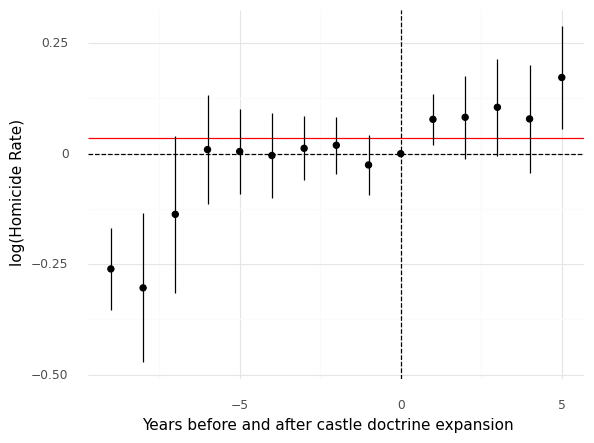

<ggplot: (8785877119720)>

In [211]:
# grab the clustered standard errors
# and average coefficient estimates
# from the regression, label them accordingly
# add a zero'th lag for plotting purposes

leads = ['lead9[T.True]', 'lead8[T.True]', 'lead7[T.True]', 'lead6[T.True]', 'lead5[T.True]', 'lead4[T.True]', 'lead3[T.True]', 'lead2[T.True]', 'lead1[T.True]']
lags = ['lag1[T.True]', 'lag2[T.True]', 'lag3[T.True]', 'lag4[T.True]', 'lag5[T.True]']

leadslags_plot = pd.DataFrame({
    'sd' : np.concatenate([np.sqrt(np.diag(event_study_formula.cov_params().loc[leads][leads])), np.array([0]), np.sqrt(np.diag(event_study_formula.cov_params().loc[lags][lags]))]),
    'mean':  np.concatenate([event_study_formula.params[leads], np.array([0]), event_study_formula.params[lags]]),
    'label': np.arange(-9, 6)}) 

leadslags_plot['lb'] = leadslags_plot['mean'] - leadslags_plot['sd']*1.96
leadslags_plot['ub'] = leadslags_plot['mean'] + leadslags_plot['sd']*1.96

# This version has a point-range at each
# estimated lead or lag
# comes down to stylistic preference at the
# end of the day!
p.ggplot(leadslags_plot, p.aes(x = 'label', y = 'mean',
             ymin = 'lb', 
             ymax = 'ub')) +\
    p.geom_hline(yintercept = 0.035169444, color = "red") +\
    p.geom_pointrange() +\
    p.theme_minimal() +\
    p.xlab("Years before and after castle doctrine expansion") +\
    p.ylab("log(Homicide Rate)") +\
    p.geom_hline(yintercept = 0,
             linetype = "dashed") +\
    p.geom_vline(xintercept = 0,
             linetype = "dashed")



#### QUESTIONS
- Put into your own words why we estimated the pre-treatment leads?
- Put into your own words what we expected to find?
- How convinced are you by this analysis that parallel trends was likely to hold in Cheng and Hoekstra's data? 
